1.

In [4]:
from numpy import product

print("Operaciones entre matrices")
print("Ingrese las dimensiones de la matriz A")
mA = int(input("Numero de filas: ")) 
nA = int(input("Numero de columnas: "))

print("\nIngrese las dimensiones de la matriz B")
mB = int(input("Numero de filas: ")) 
nB = int(input("Numero de columnas: "))

a = []
b = []

print("\nMATRIZ A ",mA,"X",nA)
for i in range(mA):
    newFila = []
    print("Elementos de la fila "+str(i+1))
    for j in range(nA):
        newFila.append(int(input("Elemento: ")))
    a.append(newFila)
    newA = a

print("\nMATRIZ B ",mB,"X",nB)
for i in range(mB):
    newFila = []
    print("Elementos de la fila"+str(i+1))
    for j in range(nB):
        newFila.append(int(input("Elemento: ")))
    b.append(newFila)
    newB = b


def producto(fA, cA, fB, cB, matrizA, matrizB):
    if cA == fB :
        productoMatriz = []
        for i in range(fA):
            newFila = []
            for j in range(cB):
                newElement  = 0
                for k in range(fB):
                    newElement += matrizA[i][k]*matrizB[k][j]
                newFila.append(newElement)
            productoMatriz.append(newFila) 
        print("\nEl producto entre la matriz A y B es:")
        for fila in productoMatriz:
            for valor in fila:
                print("\t", valor, end=" ")
            print()    
    else :
        print("\nLas dimensiones de las matrices no cumplen las condiciones para operar")

def imprimir(matriz, name):
    print("\nMATRIZ", name)
    for fila in matriz:
        for valor in fila:
            print("\t", valor, end=" ")
        print()

imprimir(a, "A")
imprimir(b, "B")
producto(mA, nA, mB, nB, a, b)


Operaciones entre matrices
Ingrese las dimensiones de la matriz A
Numero de filas: 3
Numero de columnas: 3

Ingrese las dimensiones de la matriz B
Numero de filas: 3
Numero de columnas: 2

MATRIZ A  3 X 3
Elementos de la fila 1
Elemento: 2
Elemento: 1
Elemento: 0
Elementos de la fila 2
Elemento: 1
Elemento: 3
Elemento: -2
Elementos de la fila 3
Elemento: 0
Elemento: 4
Elemento: -1

MATRIZ B  3 X 2
Elementos de la fila1
Elemento: 3
Elemento: 2
Elementos de la fila2
Elemento: 0
Elemento: -1
Elementos de la fila3
Elemento: 1
Elemento: 0

MATRIZ A
	 2 	 1 	 0 
	 1 	 3 	 -2 
	 0 	 4 	 -1 

MATRIZ B
	 3 	 2 
	 0 	 -1 
	 1 	 0 

El producto entre la matriz A y B es:
	 6 	 3 
	 1 	 -1 
	 -1 	 -4 


2.

El resultado de a1 es: 0.3357142857142856
El resultado de a0 es: 1.3142857142857152
y = 1.3142857142857152 + 0.3357142857142856x + e


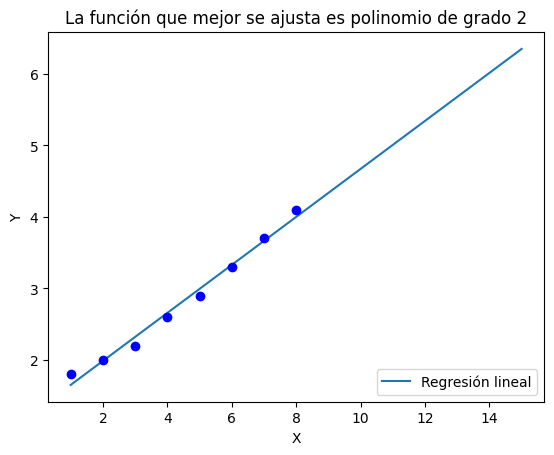

ymedia =  2.825
f = 0.0178571428571435*x**2 + 0.174999999999994*x + 1.58214285714287
coef_determinacion r2 =  0.9983613883509609
99.84% de los datos


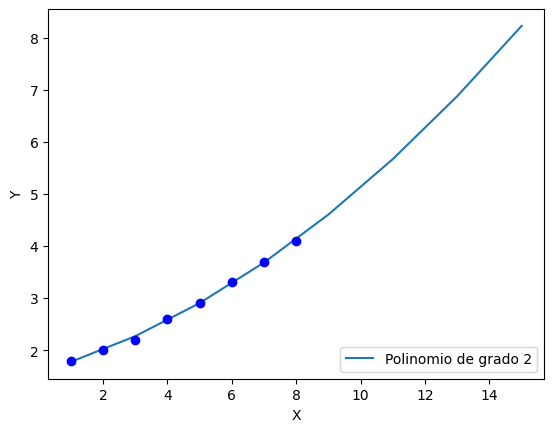

In [43]:
import numpy as np
import os
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot
from pylab import *
from numpy import *
from math import e

columnax = [1, 2, 3, 4, 5, 6, 7, 8]
columnay = [1.8, 2, 2.2, 2.6, 2.9, 3.3, 3.7, 4.1]


def minCuad():
    xlen = len(columnax)
    SumaY = 0
    SumaLogX = 0
    SumaLogXY = 0
    SumaLogX2 = 0

    for i in range(xlen):
        SumaLogX += columnax[i]

    for i in range(xlen):
        SumaY += columnay[i]

    product = [x * y for x, y in zip(columnax, columnay)]
    for i in range(len(product)):
        SumaLogXY += product[i]

    listx2 = []
    for x in columnax:
        listx2.append(x * x)

    for i in range(len(listx2)):
        SumaLogX2 += listx2[i]

    promy = SumaY / xlen
    promx = SumaLogX / xlen
    promxy = SumaLogXY / xlen
    promx2 = SumaLogX2 / xlen

    a1 = ((xlen * SumaLogXY) - (SumaLogX * SumaY)) / (xlen * SumaLogX2 - (SumaLogX) ** 2)
    print(f"El resultado de a1 es: {a1}")
    a0 = promy - (a1 * promx)
    print(f"El resultado de a0 es: {a0}")
    print(f"y = {a0} + {a1}x + e")

def pol():
    xi = [1, 2, 3, 4, 5, 6, 7, 8]
    yi = [1.8, 2, 2.2, 2.6, 2.9, 3.3, 3.7, 4.1]
    m  = 2

    xi = np.array(xi)
    yi = np.array(yi)
    n  = len(xi)

    k = m + 1
    A = np.zeros(shape=(k,k),dtype=float)
    B = np.zeros(k,dtype=float)
    for i in range(0,k,1):
        for j in range(0,i+1,1):
            coeficiente = np.sum(xi**(i+j))
            A[i,j] = coeficiente
            A[j,i] = coeficiente
        B[i] = np.sum(yi*(xi**i))

    C = np.linalg.solve(A,B)

    x = sym.Symbol('x')
    f = 0
    fetiq = 0
    for i in range(0,k,1):
        f = f + C[i]*(x**i)
        fetiq = fetiq + np.around(C[i],4)*(x**i)

    fx = sym.lambdify(x,f)
    fi = fx(xi)

    ym = np.mean(yi)
    xm = np.mean(xi)
    errado = fi - yi

    sr = np.sum((yi-fi)**2)
    syx = np.sqrt(sr/(n-(m+1)))
    st = np.sum((yi-ym)**2)

    r2 = (st-sr)/st
    r2_porcentaje = np.around(r2*100,2)

    print('ymedia = ',ym)
    print('f =',f)
    print('coef_determinacion r2 = ',r2)
    print(str(r2_porcentaje)+'% de los datos')


minCuad()

def f1(x):
    y = 1.3142857142857152 + (0.3357142857142856 * x)
    return y
def f2(x):
    y = (0.516666666666667*x**2) - (3.1*x) + 4.12619047619047
    return y
x = arange(1, 17, 2)

p1 = plot(x, f1(x))

legend(('Regresión lineal',),
        prop={'size': 10}, loc='lower right')

xlabel('X')
ylabel('Y')
title('La función que mejor se ajusta es polinomio de grado 2')

pyplot.plot(1, 1.8, marker="o", color="blue")
pyplot.plot(2, 2, marker="o", color="blue")
pyplot.plot(3, 2.2, marker="o", color="blue")
pyplot.plot(4, 2.6, marker="o", color="blue")
pyplot.plot(5, 2.9, marker="o", color="blue")
pyplot.plot(6, 3.3, marker="o", color="blue")
pyplot.plot(7, 3.7, marker="o", color="blue")
pyplot.plot(8, 4.1, marker="o", color="blue")

show()

pol()

def f2(x):
    y = (0.0178571428571435*x**2) + (0.174999999999994*x) + 1.58214285714287
    return y
x = arange(1, 17, 2)

p2 = plot(x, f2(x))

legend(('Polinomio de grado 2',),
        prop={'size': 10}, loc='lower right')

xlabel('X')
ylabel('Y')

pyplot.plot(1, 1.8, marker="o", color="blue")
pyplot.plot(2, 2, marker="o", color="blue")
pyplot.plot(3, 2.2, marker="o", color="blue")
pyplot.plot(4, 2.6, marker="o", color="blue")
pyplot.plot(5, 2.9, marker="o", color="blue")
pyplot.plot(6, 3.3, marker="o", color="blue")
pyplot.plot(7, 3.7, marker="o", color="blue")
pyplot.plot(8, 4.1, marker="o", color="blue")

show()

3.

Polinomios por tramos: 
 x = [1,2]
0.101785714285714*x**3 - 0.305357142857143*x**2 + 0.403571428571429*x + 1.6
 x = [2,3]
-0.208928571428572*x**3 + 1.55892857142857*x**2 - 3.325*x + 4.08571428571429
 x = [3,4]
0.233928571428572*x**3 - 2.42678571428572*x**2 + 8.63214285714286*x - 7.87142857142858
 x = [4,5]
-0.126785714285714*x**3 + 1.90178571428572*x**2 - 8.68214285714286*x + 15.2142857142857


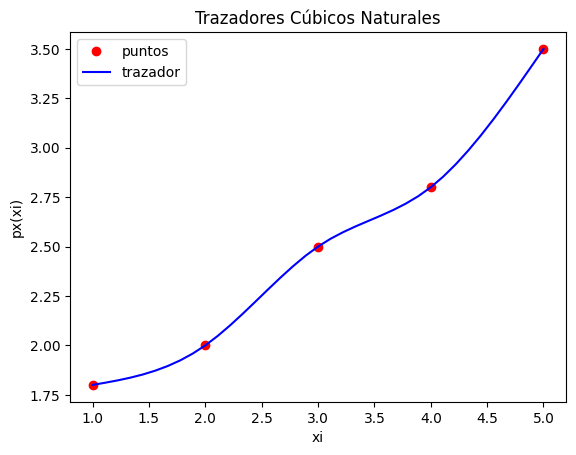

In [22]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

xi = np.array([1, 2, 3, 4, 5])
fi = np.array([1.8, 2, 2.5, 2.8, 3.5])

def traza3natural(xi,yi):
    n = len(xi)
    
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)


xi = np.array([1, 2, 3, 4, 5])
fi = np.array([1.8, 2, 2.5, 2.8, 3.5])
muestras = 10 

n = len(xi)
px_tabla = traza3natural(xi,fi)

print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))


xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()

4.

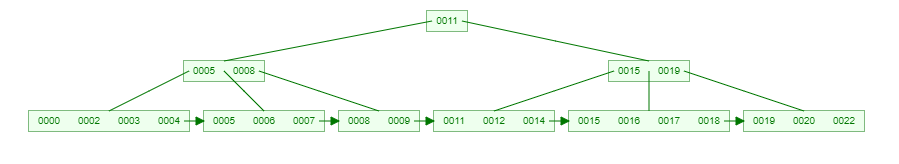